In [1]:
import pandas as pd
import numpy as np
import plotly.express as ps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
kiva = pd.read_csv('kiva_loans.csv')
kiva

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


# General expolration

In [3]:
kiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [5]:
kiva.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [4]:
kiva.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [101]:
kiva['country'].value_counts()

Philippines      160361
Kenya             75093
El Salvador       39320
Cambodia          34809
Pakistan          26853
                  ...  
Vanuatu               4
Afghanistan           2
Cote D'Ivoire         1
Mauritania            1
Bhutan                1
Name: country, Length: 85, dtype: int64

# Data Pre-Processing

In [6]:
kiva=kiva.drop(kiva.columns[[6,16]], axis=1)

In [7]:
kiva=kiva[kiva['use'].notna()]

In [8]:
kiva=kiva[kiva['disbursed_time'].notna()]

In [15]:
kiva['region']= kiva['region'].fillna("Unknown")
kiva['funded_time']= kiva['funded_time'].fillna("Unknown")
kiva['partner_id']= kiva['partner_id'].fillna("Unknown")

In [16]:
kiva.isna().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

In [17]:
kiva['borrower_genders'].value_counts()

female                                                                                                                                                                                                        425473
male                                                                                                                                                                                                          133755
female, female                                                                                                                                                                                                 12163
female, female, female                                                                                                                                                                                         11676
female, female, female, female                                                                                                                      

In [18]:
def multiple_entry_genders(borrower_genders):
    gender_list = borrower_genders.split(",")
    gender_list = list(set(gender_list))
    gender_list = [borrower_genders.strip() for borrower_genders in gender_list]
    if len(gender_list)==2:
        if 'female' in gender_list and 'male' in gender_list:
            return 'both'
        elif 'female' in gender_list:
            return 'multiple female'
        elif 'male' in gender_list:
            return 'multiple male'
    elif gender_list[0]=='female':
        return 'female'
    elif gender_list[0]=='male':
        return 'male'
    else:
        return 'unknown'
    
kiva['borrower_genders'] = kiva['borrower_genders'].apply(multiple_entry_genders) 

In [19]:
kiva['borrower_genders'].value_counts()

female             448873
male               144435
multiple female     61578
both                 6298
multiple male        3813
Name: borrower_genders, dtype: int64

In [20]:
kiva['posted_time']=kiva['posted_time'].astype(str)
kiva['posted_time']=kiva['posted_time'].str.split(' ').str.get(0).str.split('/').str.get(0)
kiva['disbursed_time']=kiva['disbursed_time'].astype(str)
kiva['disbursed_time']=kiva['disbursed_time'].str.split(' ').str.get(0).str.split('/').str.get(0)
kiva['funded_time']=kiva['funded_time'].astype(str)
kiva['funded_time']=kiva['funded_time'].str.split(' ').str.get(0).str.split('/').str.get(0)

In [21]:
kiva['use'] = kiva['use'].astype (str) 
def remove_end_spaces (string): 
    return "".join(string.strip())
kiva['use'] = kiva['use'].apply (remove_end_spaces) 
transtab = str. maketrans (dict. fromkeys (".",""))
transtab2 = str. maketrans (dict. fromkeys ("-"," "))
transtab3 = str. maketrans (dict. fromkeys ("["," "))
kiva['use'] = '|'.join (kiva['use']. tolist()).translate (transtab). split ('|') 
kiva['use'] = '|'.join (kiva['use']. tolist()).translate (transtab2). split ('|') 
kiva['use'] = '|'.join (kiva['use']. tolist()).translate (transtab3). split ('|') 

In [30]:
kiva['differnce_amount']=kiva['loan_amount']-kiva['funded_amount']

In [31]:
kiva

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,differnce_amount
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell",Pakistan,Lahore,PKR,247.0,2014-01-01,2013-12-17,2014-01-02,12.0,12,female,irregular,2014-01-01,0.0
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,Pakistan,Lahore,PKR,247.0,2014-01-01,2013-12-17,2014-01-02,11.0,14,multiple female,irregular,2014-01-01,0.0
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle van and buy another ...,India,Maynaguri,INR,334.0,2014-01-01,2013-12-17,2014-01-01,43.0,6,female,bullet,2014-01-01,0.0
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,Pakistan,Lahore,PKR,247.0,2014-01-01,2013-12-24,2014-01-01,11.0,8,female,irregular,2014-01-01,0.0
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01,2013-12-17,2014-01-01,14.0,16,female,monthly,2014-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671199,1340318,0.0,25.0,Livestock,Agriculture,"True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25,2017-07-24,Unknown,13.0,0,female,monthly,2017-07-25,25.0
671200,1340323,0.0,25.0,Livestock,Agriculture,"True, u'para compara: cemento, arenya y ladri...",Paraguay,Concepción,USD,58.0,2017-07-25,2017-07-25,Unknown,13.0,0,female,monthly,2017-07-25,25.0
671201,1340316,25.0,25.0,Livestock,Agriculture,"True, u'to start a turducken farm'] this lo...",Kenya,Unknown,KES,138.0,2017-07-25,2017-07-24,2017-07-26,13.0,1,female,monthly,2017-07-25,0.0
671203,1340338,0.0,25.0,Livestock,Agriculture,"True, u'to start a turducken farm'] this lo...",Kenya,Unknown,KES,138.0,2017-07-26,2017-07-25,Unknown,13.0,0,female,monthly,2017-07-26,25.0


In [100]:
kiva.to_csv('cleaningKiva.csv')

# Explorating by Visualization

# - Gender
# - Sector & activities
# - Country & region

# ـــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# Gender

Who is the most borrower males and females?

In [33]:
kiva['borrower_genders'].value_counts()

female             448873
male               144435
multiple female     61578
both                 6298
multiple male        3813
Name: borrower_genders, dtype: int64

What are the counts of loan amount for various (repayment interval, sectors)?

In [34]:
g =kiva.groupby(['country','sector','activity','borrower_genders','repayment_interval']).sum().sort_values(by='loan_amount', ascending=False).reset_index()
g.head()

,country,sector,activity,borrower_genders,repayment_interval,id,funded_amount,loan_amount,term_in_months,lender_count,differnce_amount
0,Philippines,Retail,General Store,female,irregular,40230217056,13959300.0,14185225.0,353573.0,327419,225925.0
1,Philippines,Agriculture,Pigs,female,irregular,18743770566,5421200.0,5440250.0,170301.0,140334,19050.0
2,Cambodia,Agriculture,Farming,multiple female,monthly,5116304020,4597725.0,5050650.0,79122.0,130863,452925.0
3,Kenya,Agriculture,Farming,female,monthly,10020078603,3462025.0,3702475.0,135301.0,107617,240450.0
4,Kyrgyzstan,Agriculture,Livestock,female,monthly,2781274744,3415125.0,3646250.0,45712.0,100962,231125.0


In [36]:
g=g.drop(g.columns[[5,6,8,9,10]], axis=1)

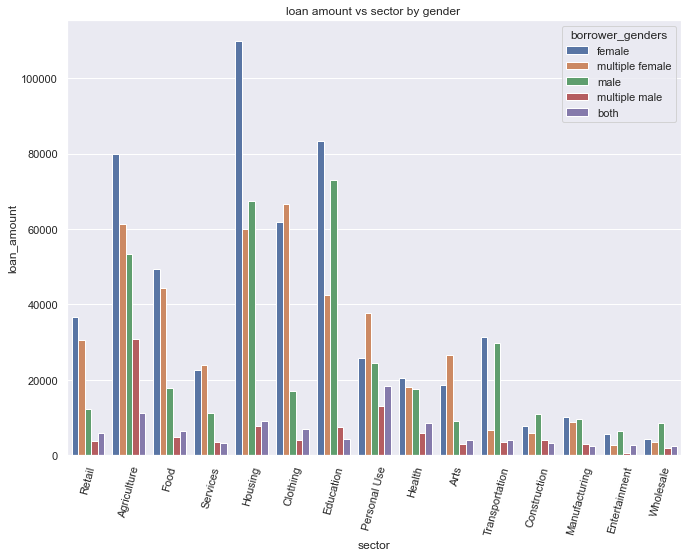

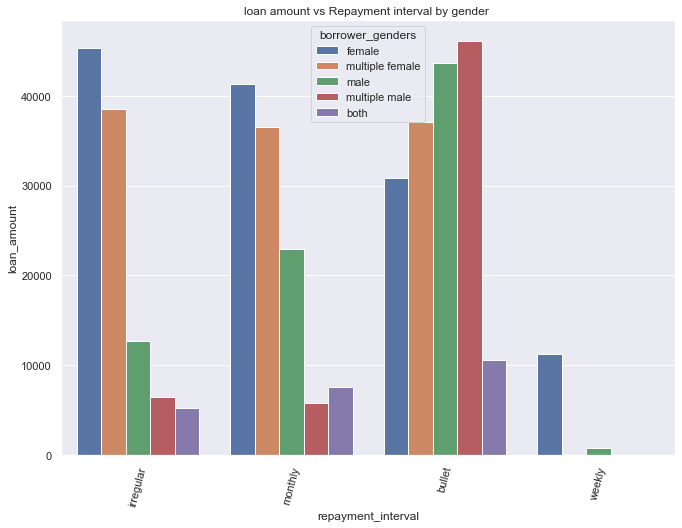

In [85]:
plt.figure(figsize=(11,8))

plt.title('loan amount vs sector by gender ')
plt.xticks(rotation=75)
sns.barplot(x='sector', y='loan_amount', data = g, ci=None, hue ='borrower_genders')
plt.show()
plt.figure(figsize=(11,8))
plt.title('loan amount vs Repayment interval by gender ')
plt.xticks(rotation=75)
sns.barplot(x='repayment_interval', y='loan_amount', data = g, ci=None, hue ='borrower_genders')
plt.show()

What is the percentage of each repayment interval?

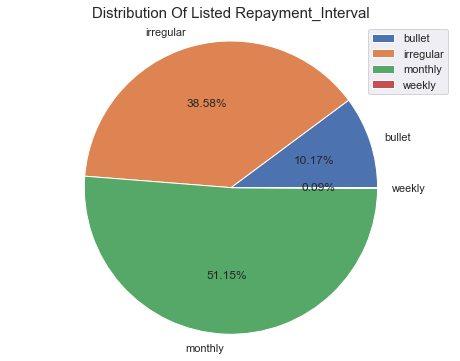

In [78]:
repayment=kiva.groupby(["repayment_interval"]).date.count().reset_index()
repayment
plt.figure(figsize=(8,6))
plt.pie(repayment.date,labels=repayment.repayment_interval, autopct="%0.2f%%")
plt.axis("equal")
plt.title("Distribution of listed repayment_interval".title(), fontsize=15)
plt.legend()
plt.show()

The most sector has 0 funded amount

In [98]:
partner = kiva[kiva['funded_amount']==0].groupby(['partner_id','sector'])['funded_amount'].value_counts().sort_values(ascending=True)
partner.tail(10)

partner_id  sector        funded_amount
138.0       Retail        0.0               34
167.0       Food          0.0               35
199.0       Retail        0.0               37
311.0       Personal Use  0.0               42
199.0       Agriculture   0.0               43
204.0       Agriculture   0.0               65
455.0       Services      0.0               70
156.0       Food          0.0               77
            Agriculture   0.0              121
288.0       Agriculture   0.0              124
Name: funded_amount, dtype: int64

# Country & region

Number of loans by country

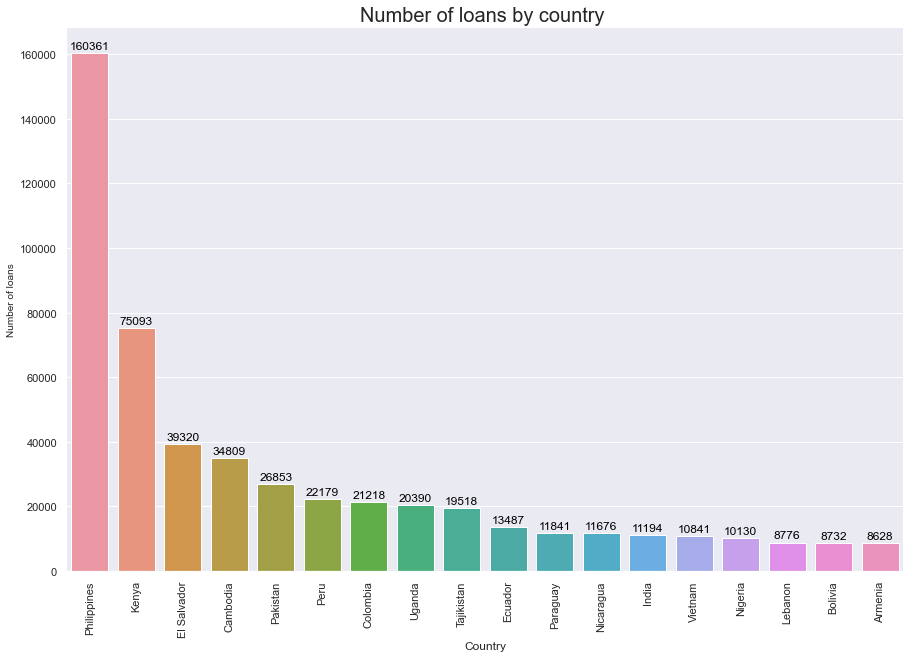

In [99]:
currency_loans = kiva.groupby(["country"]).id.count().reset_index().sort_values(by="id", ascending=False).iloc[:18]

plt.figure(figsize=(15,10))
chart =sns.barplot(data= currency_loans, x="country", y="id")
plt.xticks(rotation=90)
for p in chart.patches:
    chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.title("Number of loans by country ", fontsize=20)
plt.ylabel("Number of loans", fontsize=10)
plt.xlabel("Country")
plt.show()

Distribution of loans per country

In [57]:
maps =kiva.groupby("country").date.count().reset_index()

import plotly.offline as py

import plotly.graph_objs as go


data = [ dict(
        type = 'choropleth',
        locations = maps['country'],
        locationmode = 'country names',
        z = maps['date'],
        text = maps['country'],
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Loans'),
      ) ]

layout = dict(
    title = 'Couting of Loans Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

figure = dict( data=data, layout=layout )
py.iplot(figure, validate=False, filename='map-countrys-count')

Determine specific region

In [55]:
kiva[kiva['funded_amount'] == 0]['country'].value_counts()

Kenya                                   515
Pakistan                                245
El Salvador                             197
Cambodia                                179
Colombia                                155
Nigeria                                 126
Philippines                             110
Uganda                                  110
Tajikistan                               82
Togo                                     71
Sierra Leone                             62
Vietnam                                  61
Liberia                                  52
Mozambique                               47
Myanmar (Burma)                          46
Peru                                     26
Samoa                                    24
Mexico                                   23
Armenia                                  22
Rwanda                                   20
Bolivia                                  19
Nicaragua                                18
Egypt                           

In [58]:
kenya = kiva[kiva['country']=='Kenya']
kenya

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,differnce_amount
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000,Kenya,Unknown,KES,Unknown,2014-01-01,2014-01-30,2014-01-29,4.0,6,female,irregular,2014-01-01,0.0
46,653185,250.0,250.0,Fruits & Vegetables,Food,"to purchase sacks of tomatoes, potatoes, fruit...",Kenya,Voi,KES,164.0,2014-01-02,2013-12-12,2014-01-02,13.0,7,female,irregular,2014-01-02,0.0
57,653237,250.0,250.0,Cosmetics Sales,Retail,"to purchase body lotions, hair oil, jewelery, ...",Kenya,Likoni,KES,164.0,2014-01-02,2013-12-09,2014-01-05,14.0,3,female,irregular,2014-01-02,0.0
58,653229,250.0,250.0,Tailoring,Services,to purchase cloth materials and sewing thread ...,Kenya,Likoni,KES,164.0,2014-01-02,2013-12-09,2014-01-02,14.0,1,female,irregular,2014-01-02,0.0
67,1080150,125.0,125.0,Energy,Services,purchase solar lanterns for resale,Kenya,Unknown,KES,Unknown,2014-01-02,2014-01-30,2014-01-23,3.0,6,male,irregular,2014-01-02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671194,1340332,0.0,25.0,Livestock,Agriculture,Kiva Coordinator fixed issue loan (no longer v...,Kenya,Unknown,KES,138.0,2017-07-25,2017-07-25,Unknown,13.0,0,multiple female,monthly,2017-07-25,25.0
671197,1340330,0.0,25.0,Livestock,Agriculture,Pretend the issue with loan got addressed by K...,Kenya,Unknown,KES,138.0,2017-07-25,2017-07-25,Unknown,13.0,0,female,monthly,2017-07-25,25.0
671201,1340316,25.0,25.0,Livestock,Agriculture,"True, u'to start a turducken farm'] this lo...",Kenya,Unknown,KES,138.0,2017-07-25,2017-07-24,2017-07-26,13.0,1,female,monthly,2017-07-25,0.0
671203,1340338,0.0,25.0,Livestock,Agriculture,"True, u'to start a turducken farm'] this lo...",Kenya,Unknown,KES,138.0,2017-07-26,2017-07-25,Unknown,13.0,0,female,monthly,2017-07-26,25.0


In [69]:
loan_amount_by_regions = kenya.groupby ('region')['loan_amount'].sum().sort_values(ascending = False). reset_index().iloc[:6]
loan_amount_by_regions

,region,loan_amount
0,Webuye,2131400.0
1,Unknown,1659050.0
2,Teso,1295350.0
3,Kitale,1262850.0
4,Nairobi,1202525.0
5,Eldoret,1175250.0


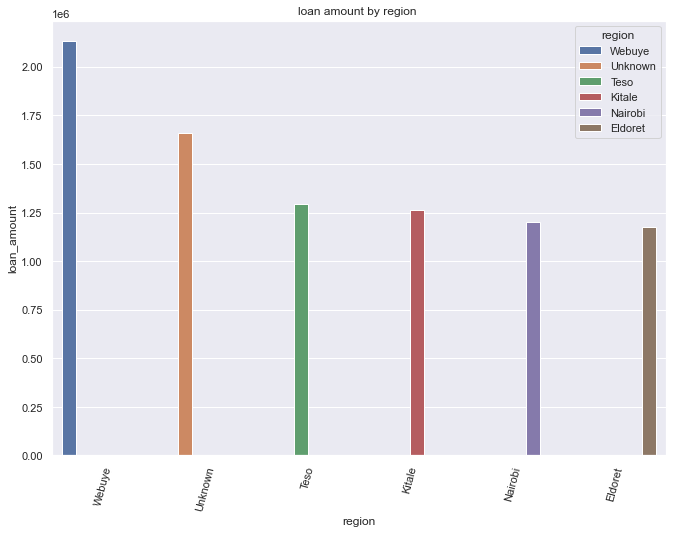

In [75]:
plt.figure(figsize=(11,8))

plt.title('loan amount by region ')
plt.xticks(rotation=75)
sns.barplot(x='region', y='loan_amount', data = loan_amount_by_regions, ci=None, hue ='region')
plt.show()


In [60]:
loan_amount_by_regions = kenya.groupby ('sector')['loan_amount'].sum().sort_values(ascending = False). reset_index()
loan_amount_by_regions

,sector,loan_amount
0,Agriculture,17521125.0
1,Food,4877300.0
2,Retail,4600000.0
3,Services,1966450.0
4,Clothing,1651575.0
5,Transportation,863725.0
6,Education,844925.0
7,Health,680625.0
8,Personal Use,362050.0
9,Construction,307975.0


# Sectors

What is the most sector that has loans ?

In [23]:
kiva['sector'].value_counts()

Agriculture       179149
Food              135453
Retail            123410
Services           43947
Personal Use       36246
Housing            33553
Clothing           32333
Education          30778
Transportation     15413
Arts               11904
Health              9151
Construction        6160
Manufacturing       6151
Entertainment        725
Wholesale            624
Name: sector, dtype: int64

In [28]:
Agriculture= kiva[kiva['sector'] == 'Agriculture']

In [29]:
Agriculture['activity'].value_counts()

Farming             72621
Agriculture         26617
Pigs                26516
Livestock           13056
Poultry              9686
Animal Sales         9212
Dairy                7847
Cattle               7834
Farm Supplies        4312
Flowers               819
Land Rental           273
Veterinary Sales      198
Aquaculture           108
Beekeeping             50
Name: activity, dtype: int64

In [80]:
Agre=Agriculture.groupby ('activity')['loan_amount'].sum().sort_values(ascending = False). reset_index()
Agre

,activity,loan_amount
0,Farming,51418300.0
1,Agriculture,26591700.0
2,Livestock,14705125.0
3,Pigs,12479900.0
4,Animal Sales,10472700.0
5,Poultry,8192075.0
6,Cattle,7928750.0
7,Dairy,5166300.0
8,Farm Supplies,3396125.0
9,Flowers,698625.0


What is the activity that has the lowest funded amount  ?

In [82]:
Funded =Agriculture.groupby ('activity')['funded_amount'].sum().sort_values(ascending = False). reset_index()
Funded

,activity,funded_amount
0,Farming,47689225.0
1,Agriculture,25219875.0
2,Livestock,13657225.0
3,Pigs,12068175.0
4,Animal Sales,9946725.0
5,Poultry,7869800.0
6,Cattle,7249225.0
7,Dairy,4941525.0
8,Farm Supplies,3131950.0
9,Flowers,658675.0


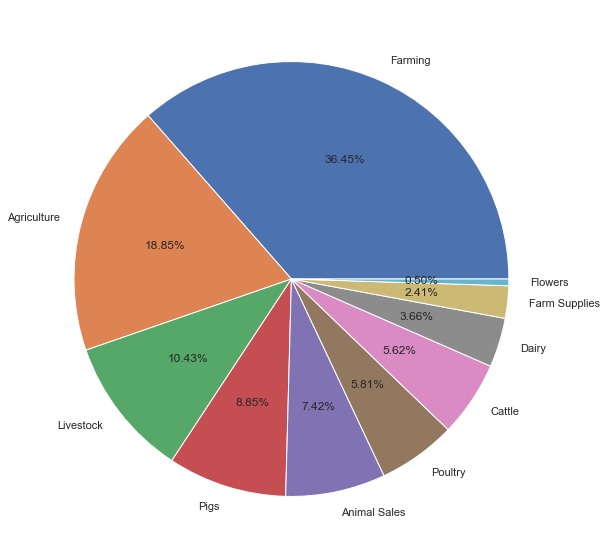

In [84]:
act = Agriculture.groupby('activity')[['loan_amount']].sum().sort_values(by = 'loan_amount',ascending= False).reset_index().head(10)

plt.figure(figsize = [10,10])
plt.pie(act['loan_amount'],labels = act['activity'],autopct="%0.2f%%")

plt.show()

Repayment interval